In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data=pd.read_csv('Bias_correction_ucl.csv',parse_dates=['Date'])
Data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

# Exploratory Data Analysis

In [3]:
Data.shape

(7752, 25)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null datetime64[ns]
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slop

In [5]:
Data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

As the NaN values are very less compared to the total observations so we drop the observations having nan values.

In [6]:
Data=Data.dropna()
Data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [7]:
Data.shape# Shape of Dataset after dropping the nan values.

(7588, 25)

In [8]:
Data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
Data.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

# Bivariate Analysis

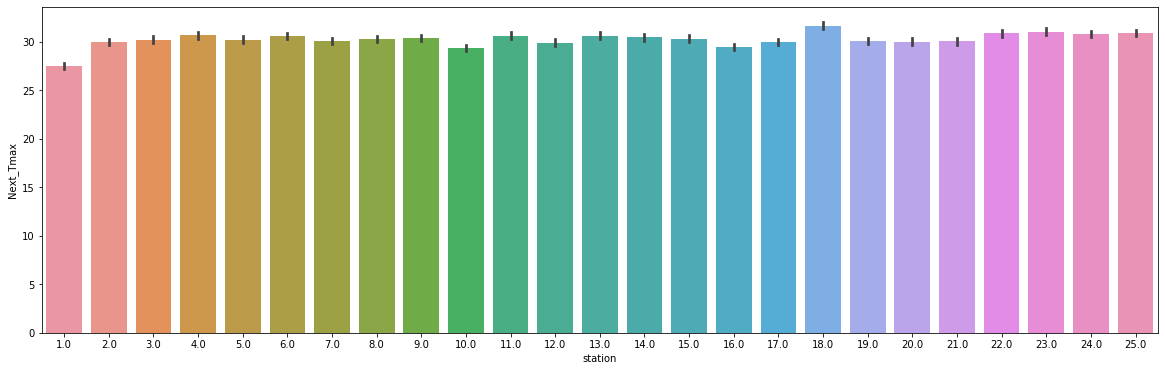

In [10]:
plt.figure(figsize=(20,6))
sns.barplot(x='station',y='Next_Tmax',data=Data)

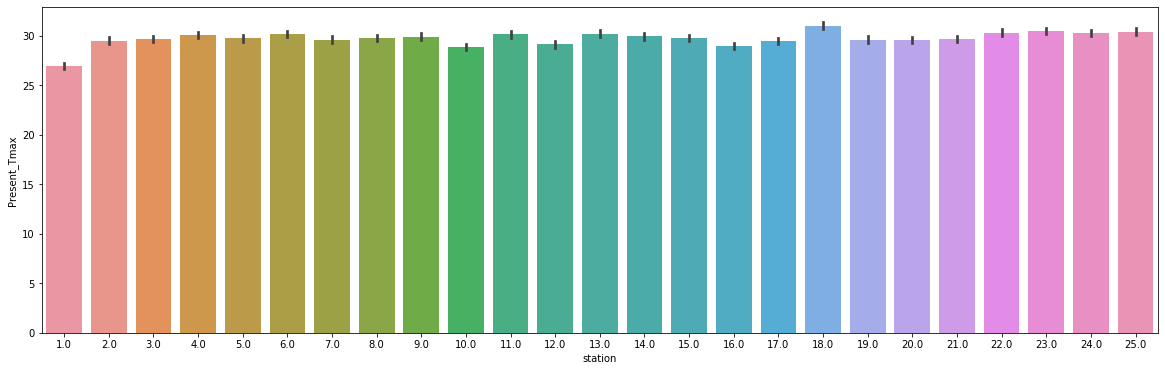

In [11]:
plt.figure(figsize=(20,6))
sns.barplot(x='station',y='Present_Tmax',data=Data)

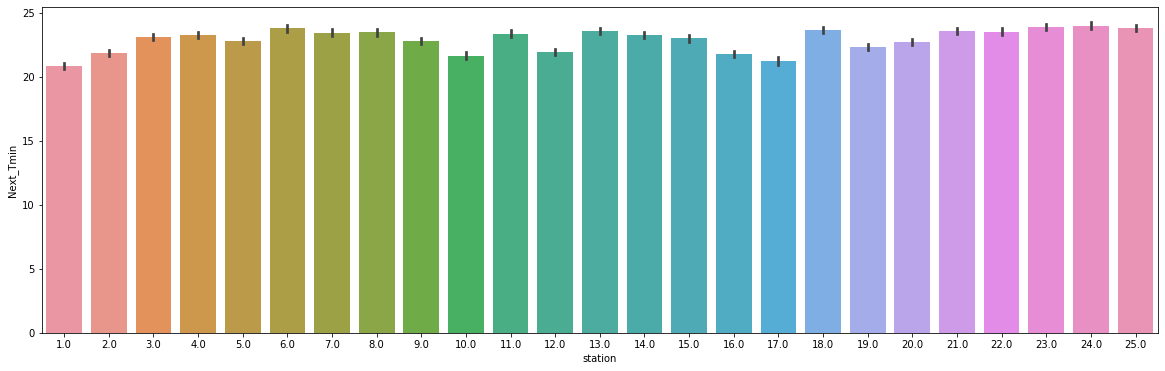

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(x='station',y='Next_Tmin',data=Data)

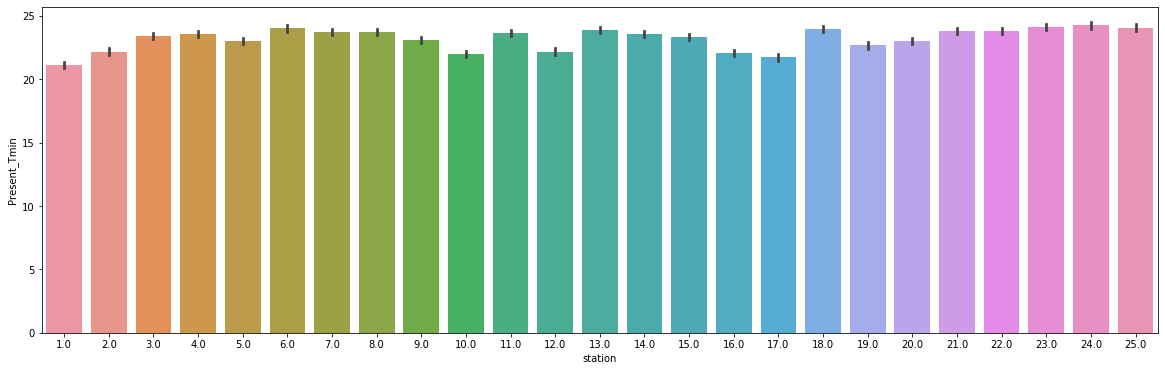

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(x='station',y='Present_Tmin',data=Data)

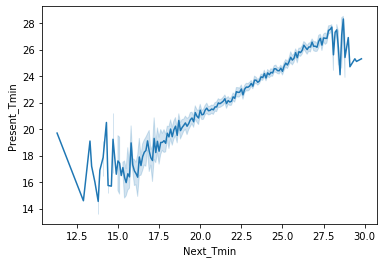

In [14]:
sns.lineplot(x='Next_Tmin',y='Present_Tmin',data=Data)

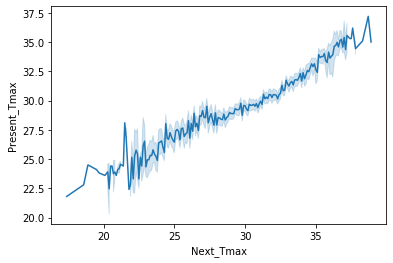

In [15]:
sns.lineplot(x='Next_Tmax',y='Present_Tmax',data=Data)

Station wise Present and Next day maximum Air Temperature and Station wise Present and Next day minimum Air Temperature are directly propertional.With increase in Present day maximum air temperature Next day air temperature increases and with decrease in present day minimum temperature next day minimum air temperature decreases.

In Station 18 the Maximum  air temperature is highest and in Station 1 the minimum air temperature is lowest. 

In [16]:
Data['Year']=Data['Date'].dt.year
Data['Month']=Data['Date'].dt.month_name()
Data['Day']=Data['Date'].dt.day
Data.drop(['Date'],axis=1,inplace=True)
Data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,June,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,June,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,June,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,June,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,June,30


In [17]:
print('Minimum Present_Tmax ',min(Data['Present_Tmax']))
print('Maximum Present_Tmax ',max(Data['Present_Tmax']))
print('Average Present_Tmax ',np.mean(Data['Present_Tmax']))

Minimum Present_Tmax  20.0
Maximum Present_Tmax  37.6
Average Present_Tmax  29.748365840801227


In [18]:
print('Minimum Present_Tmax ',min(Data['Present_Tmin']))
print('Maximum Present_Tmax ',max(Data['Present_Tmin']))
print('Average Present_Tmax ',np.mean(Data['Present_Tmin']))

Minimum Present_Tmax  11.3
Maximum Present_Tmax  29.9
Average Present_Tmax  23.195809172377487


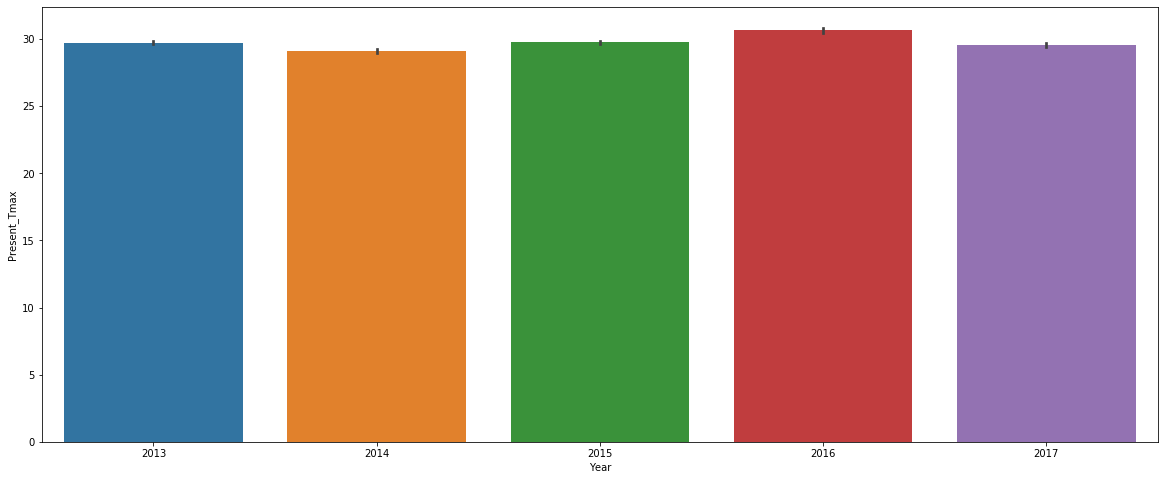

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Present_Tmax',data=Data)

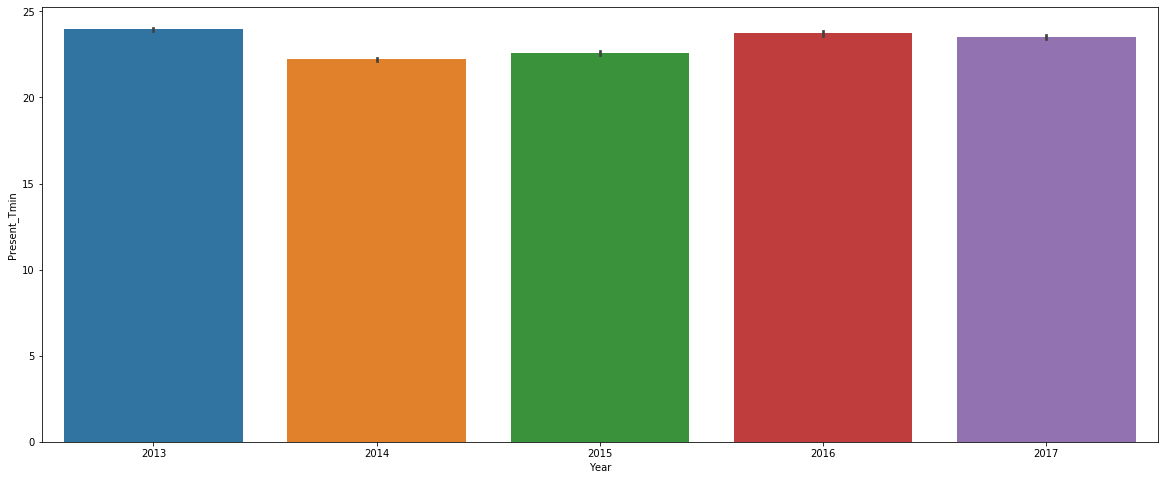

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Present_Tmin',data=Data)

Maximum air temperature between 0 and 21 h on the present day of 2016 is highest and Minimum air temperature between 0 and 21 h on the present day in 2014 is lowest than other years.

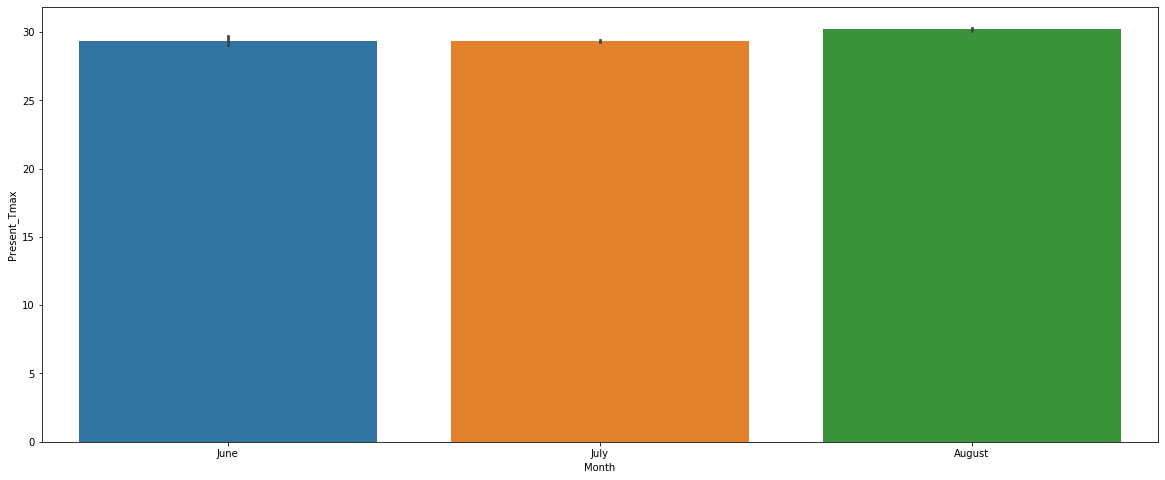

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(x='Month',y='Present_Tmax',data=Data)

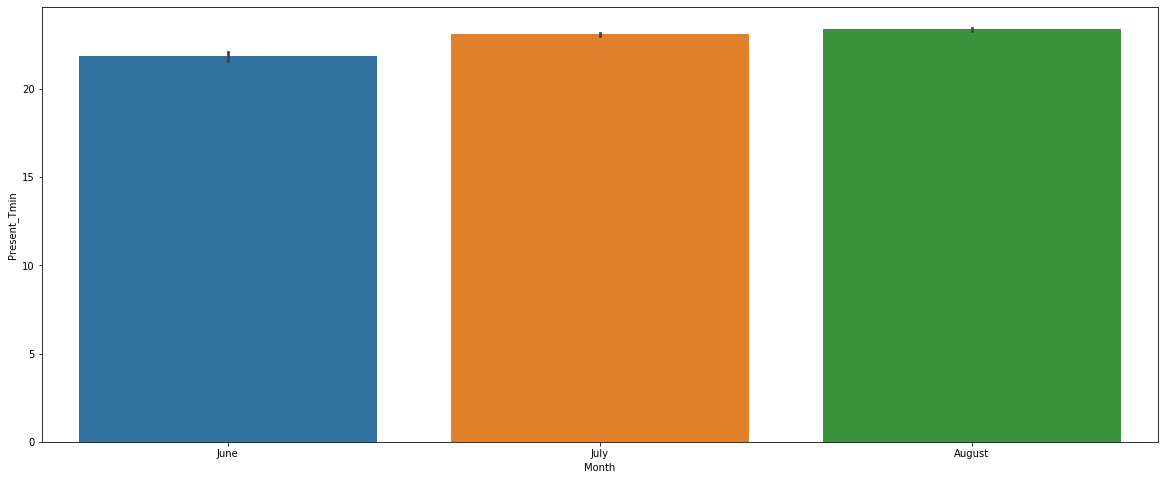

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x='Month',y='Present_Tmin',data=Data)

In South Korea summer falls in between June to August of every year.Maximum air temperature between 0 and 21 h on the present day of August is highest and Minimum air temperature between 0 and 21 h on the present day in June is lowest than other Summer Months.

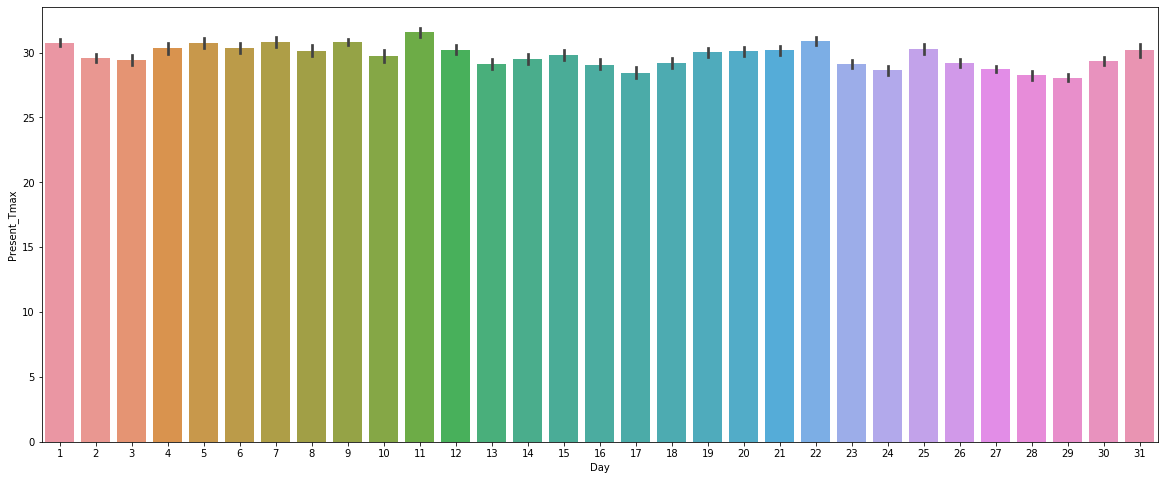

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x='Day',y='Present_Tmax',data=Data)

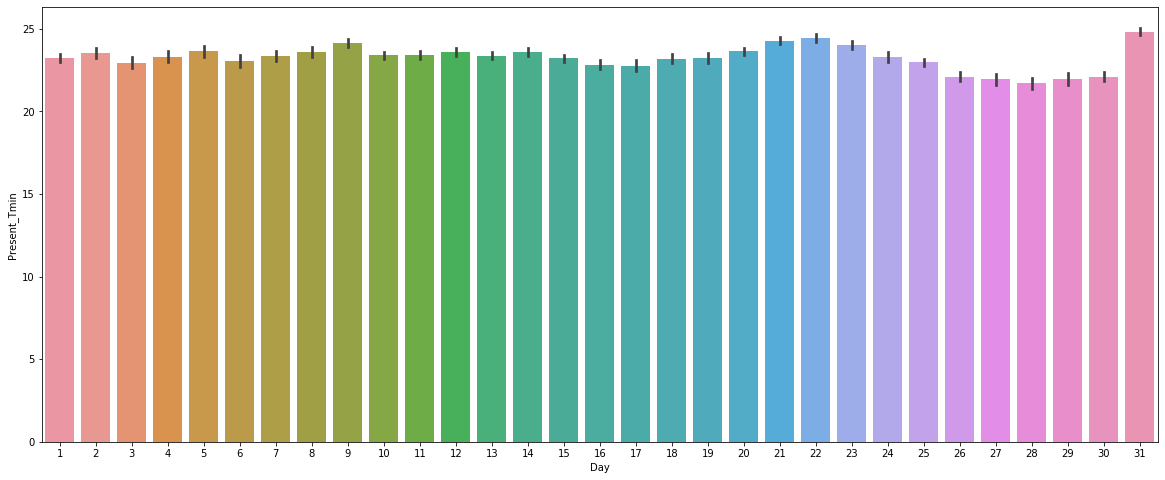

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(x='Day',y='Present_Tmin',data=Data)

On the 11th of every month the Air temperature is highest and On 28th Air Temperature is lowest than other Days.

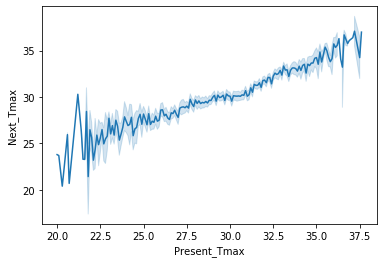

In [25]:
sns.lineplot(x='Present_Tmax',y='Next_Tmax',data=Data)

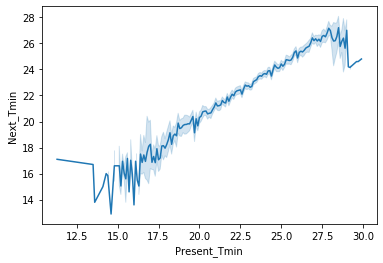

In [26]:
sns.lineplot(x='Present_Tmin',y='Next_Tmin',data=Data)

Present Day Maximum & Minimum air Temperatures are directly propertional to Next Day Maximum & Minimum air Temperatures respectively.So increase in Today's Maximum air temperature Next Day Maximum Air Temperature increases and Decrease in Today's Minimum air Tempeature Next Day Minimum Air temperature decreases linearly.

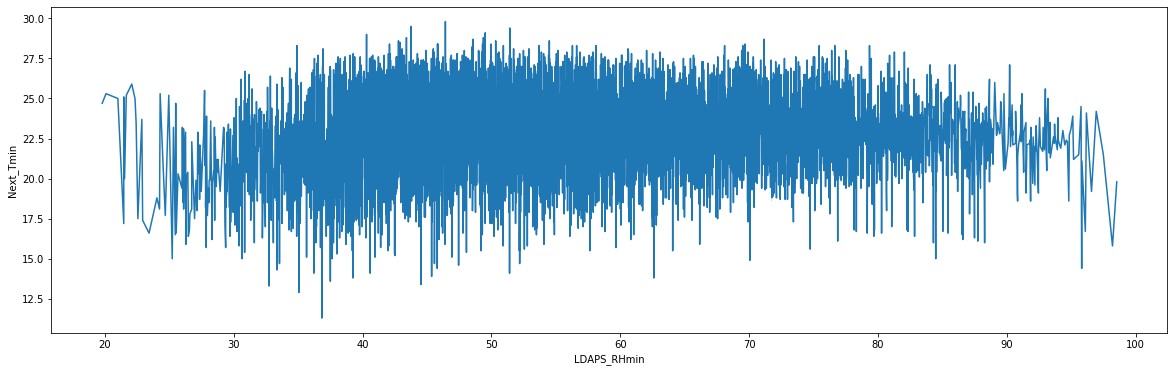

In [27]:
#LDAPS model forecast of next-day minimum relative humidity
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_RHmin',y='Next_Tmin',data=Data)

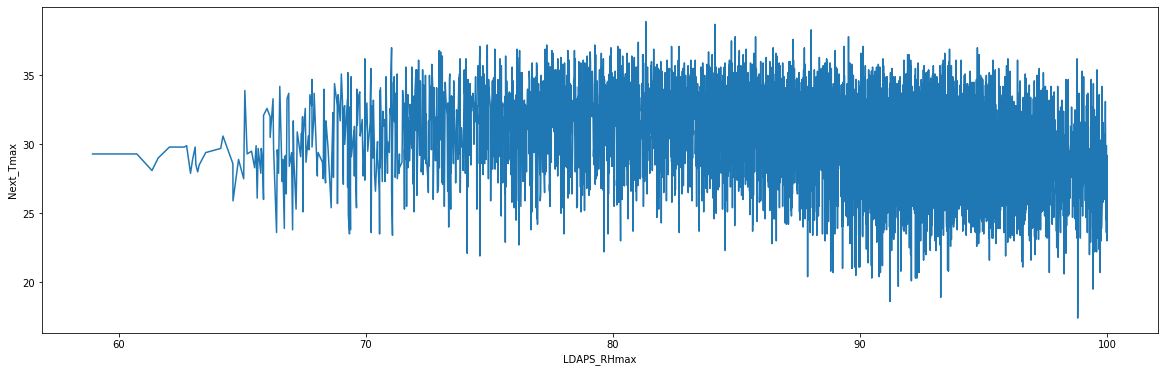

In [28]:
# LDAPS model forecast of next-day maximum relative humidity
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_RHmax',y='Next_Tmax',data=Data)

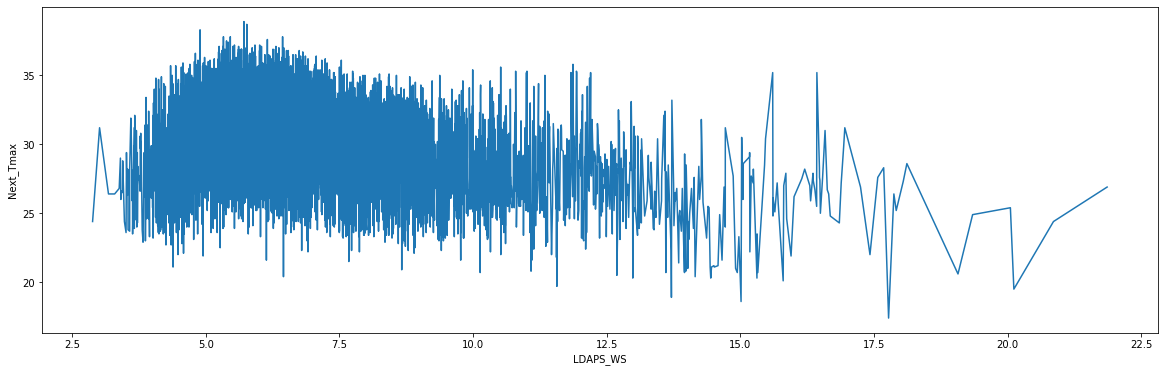

In [29]:
#LDAPS model forecast of next-day average wind speed 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_WS',y='Next_Tmax',data=Data)

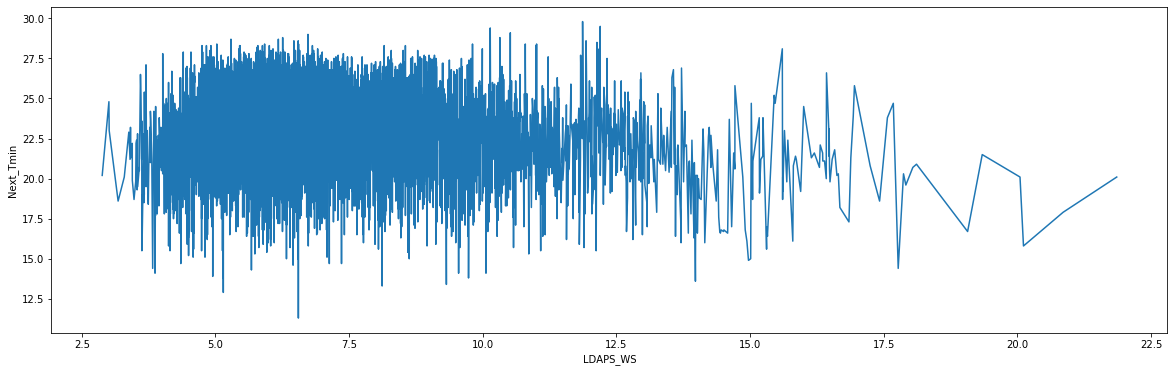

In [30]:
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_WS',y='Next_Tmin',data=Data)

At average wind speed of 4-7 m/s the Next Day Air Temperature is Highest and with increase in wind speed the Next Day temperature Decreases.

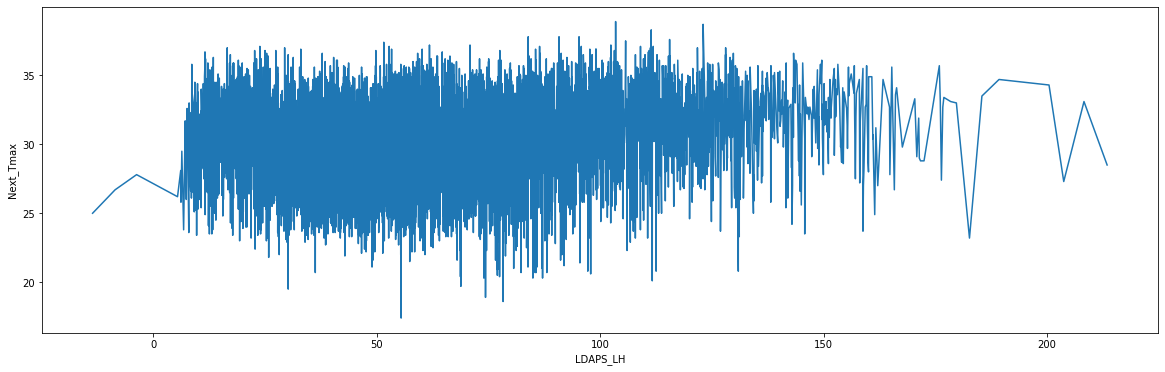

In [31]:
#LDAPS model forecast of next-day average latent heat flux (W/m2)
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_LH',y='Next_Tmax',data=Data)

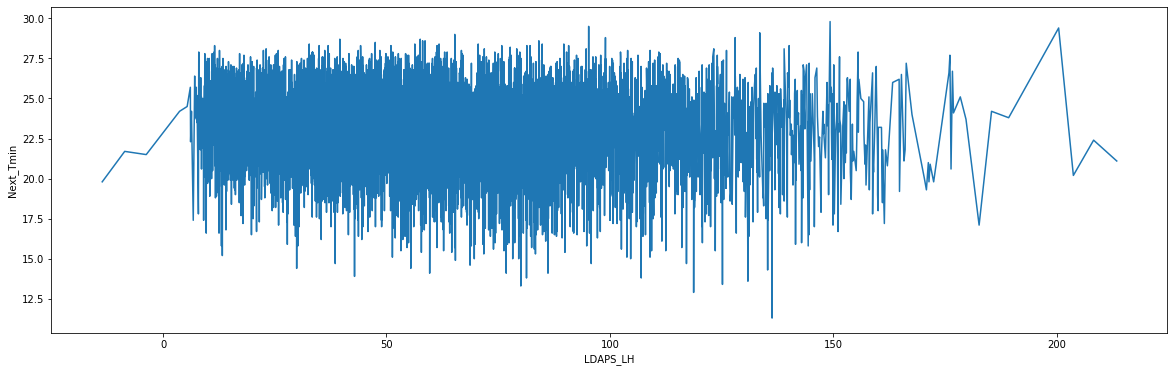

In [32]:
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_LH',y='Next_Tmin',data=Data)

At model forecast of next-day average latent heat flux from 10-160 W/m2 the Next Day Air Temperature is Higher.

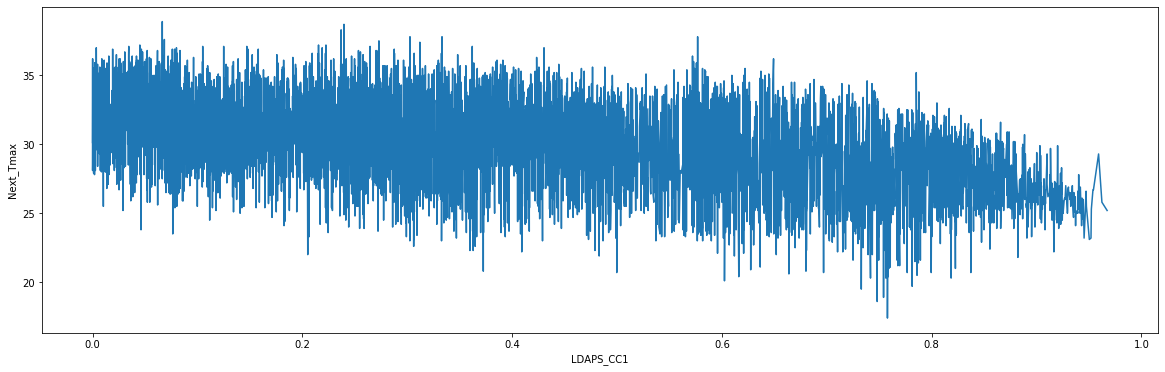

In [33]:
#LDAPS model forecast of next-day 1st 6-hour split average cloud cover 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_CC1',y='Next_Tmax',data=Data)

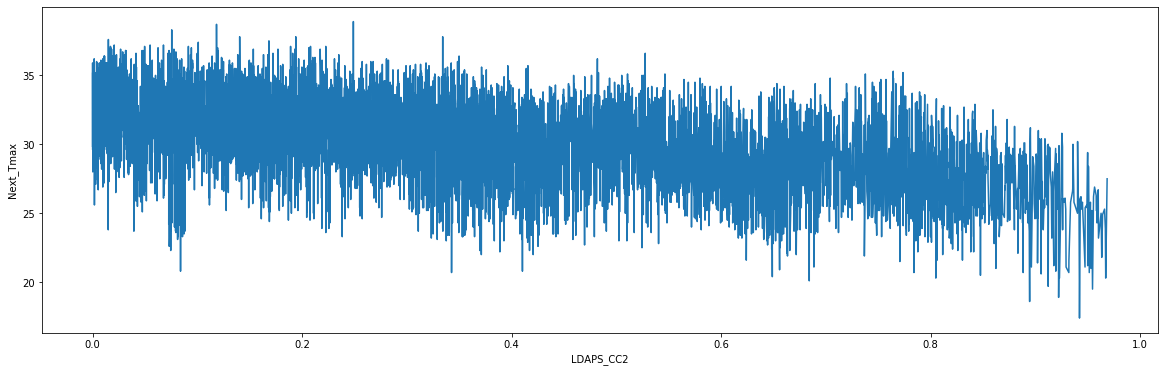

In [34]:
#LDAPS model forecast of next-day 2nd 6-hour split average cloud cover 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_CC2',y='Next_Tmax',data=Data)

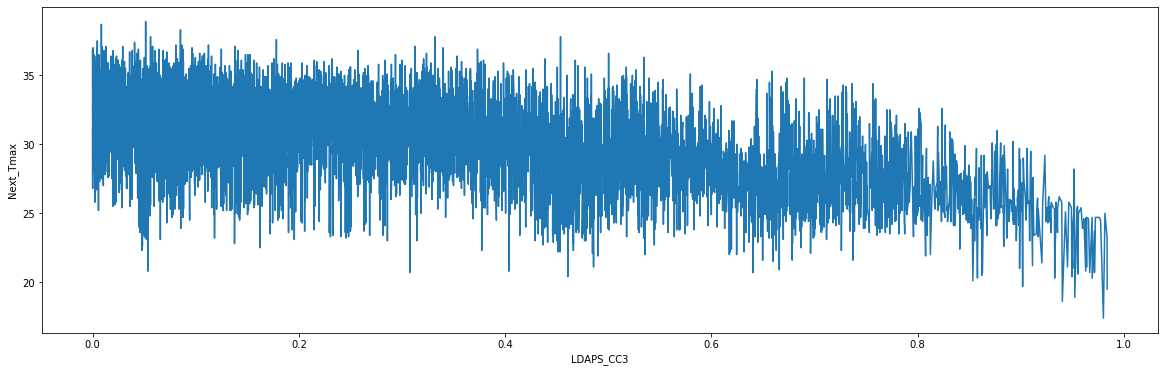

In [35]:
#LDAPS model forecast of next-day 3rd 6-hour split average cloud cover 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_CC3',y='Next_Tmax',data=Data)

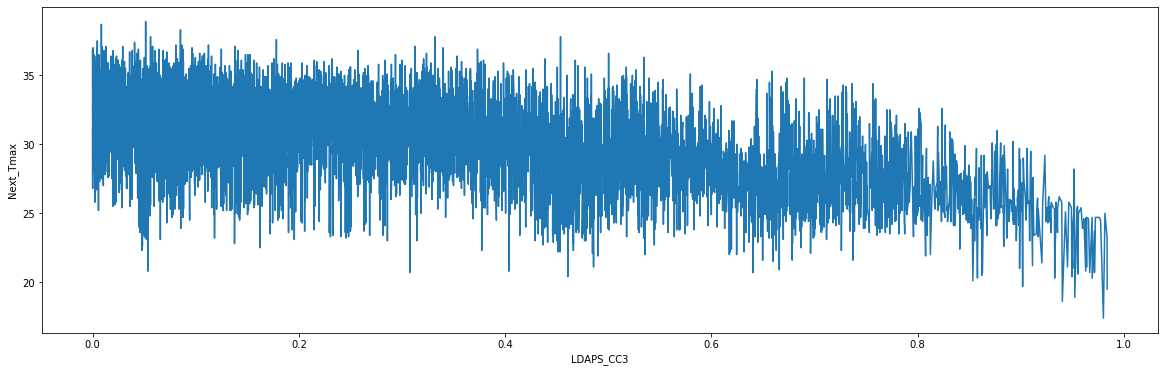

In [36]:
#LDAPS model forecast of next-day 4th 6-hour split average cloud cover 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_CC3',y='Next_Tmax',data=Data)

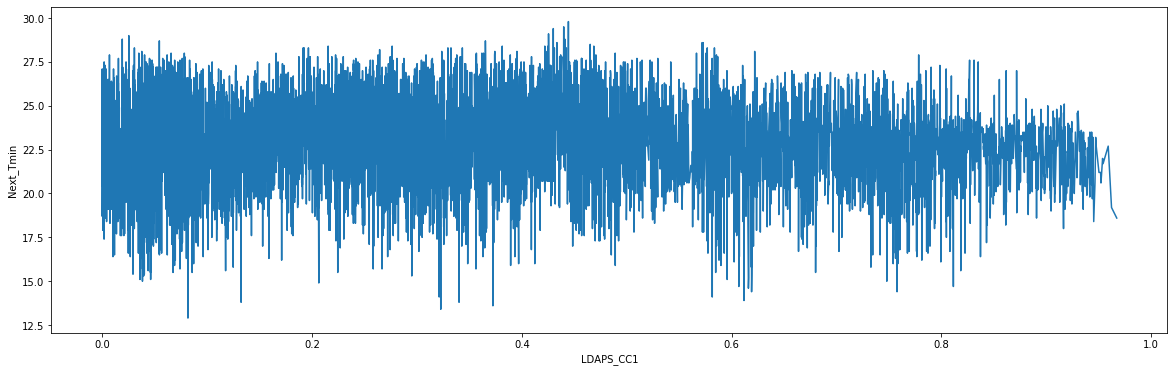

In [37]:
#LDAPS model forecast of next-day 1st 6-hour split average cloud cover 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_CC1',y='Next_Tmin',data=Data)

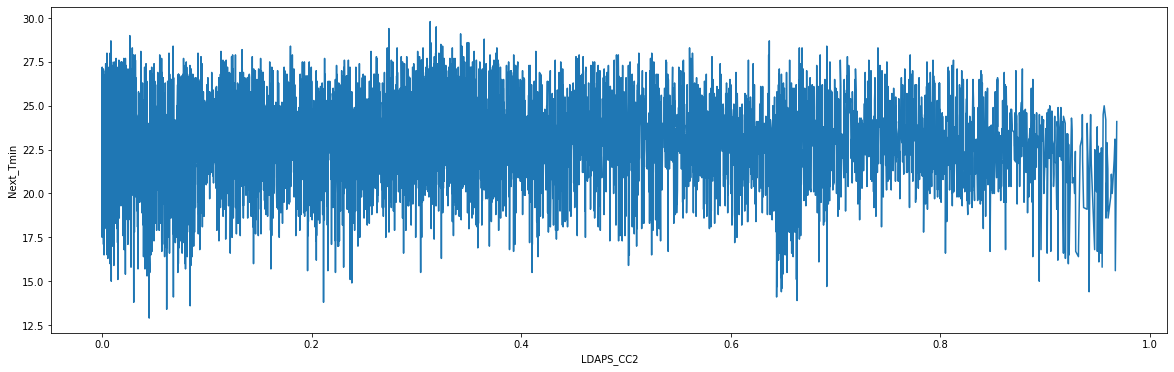

In [38]:
#LDAPS model forecast of next-day 2nd 6-hour split average cloud cover 
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_CC2',y='Next_Tmin',data=Data)

With Increase in average cloud coverage the Air temperature Decreases.

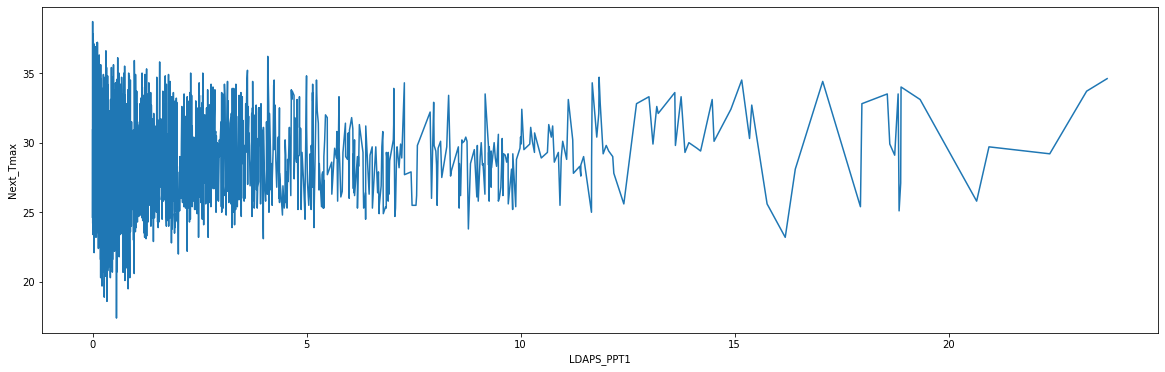

In [39]:
#LDAPS model forecast of next-day 1st 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT1',y='Next_Tmax',data=Data)

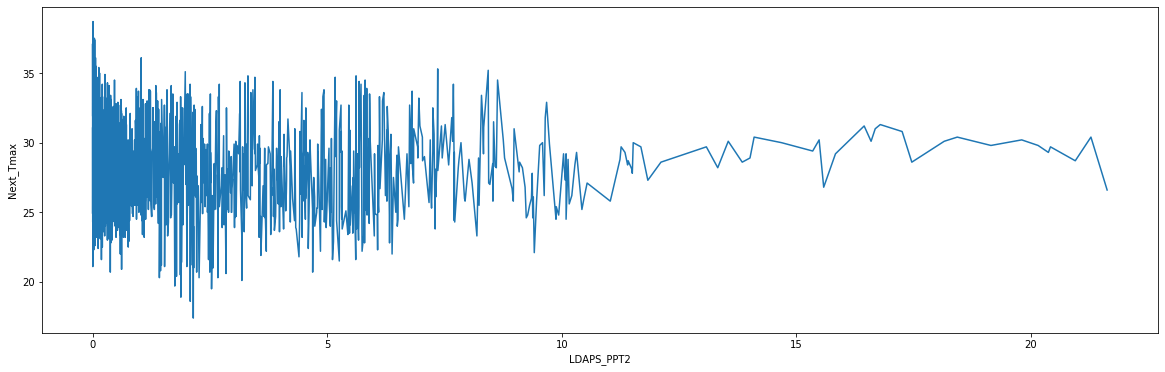

In [40]:
#LDAPS model forecast of next-day 2nd 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT2',y='Next_Tmax',data=Data)

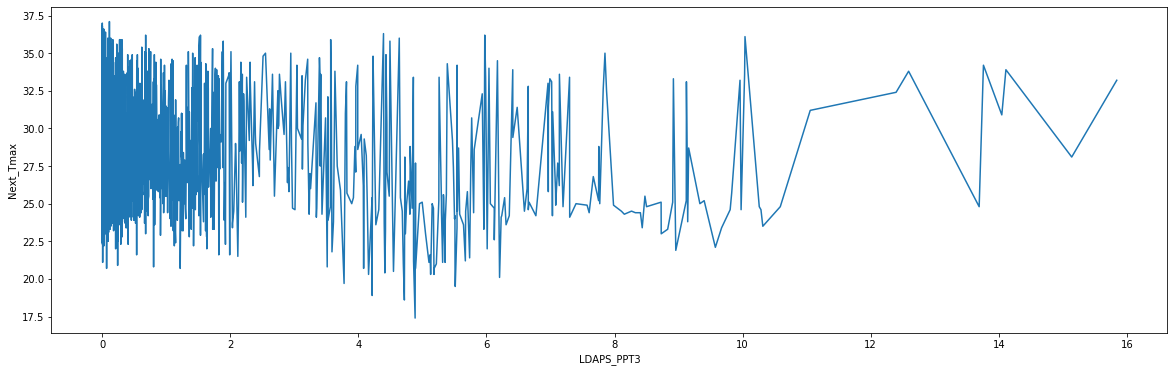

In [41]:
#LDAPS model forecast of next-day 3rd 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT3',y='Next_Tmax',data=Data)

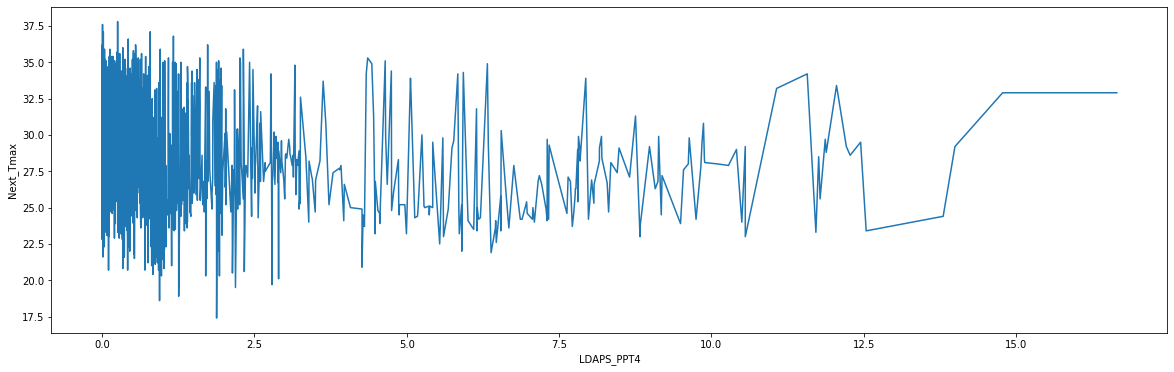

In [42]:
#LDAPS model forecast of next-day 4th 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT4',y='Next_Tmax',data=Data)

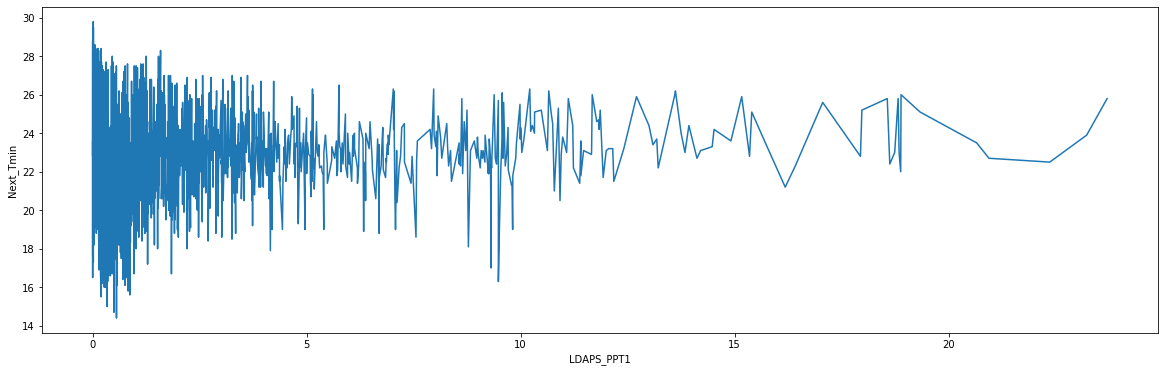

In [43]:
#LDAPS model forecast of next-day 1st 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT1',y='Next_Tmin',data=Data)

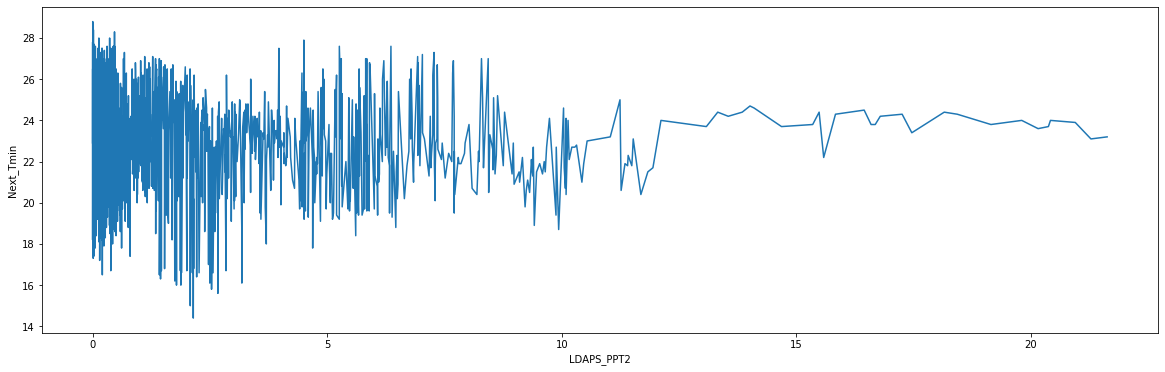

In [44]:
#LDAPS model forecast of next-day 2nd 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT2',y='Next_Tmin',data=Data)

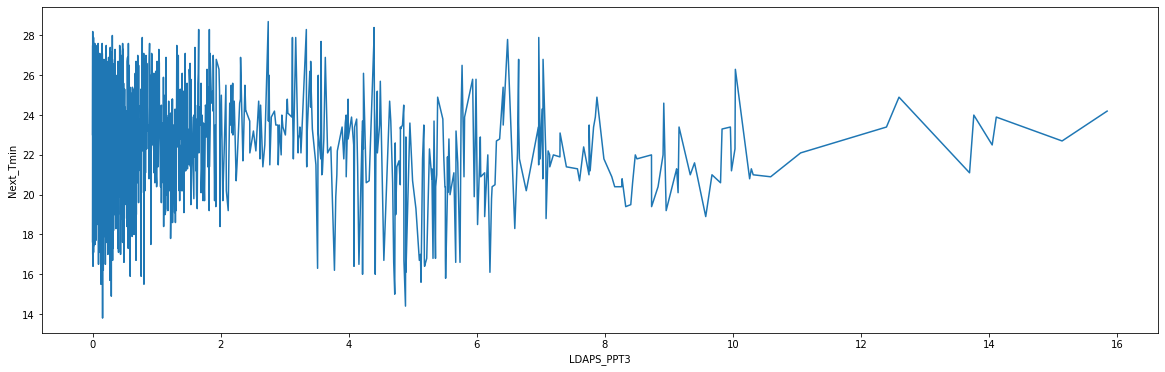

In [45]:
#LDAPS model forecast of next-day 3rd 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT3',y='Next_Tmin',data=Data)

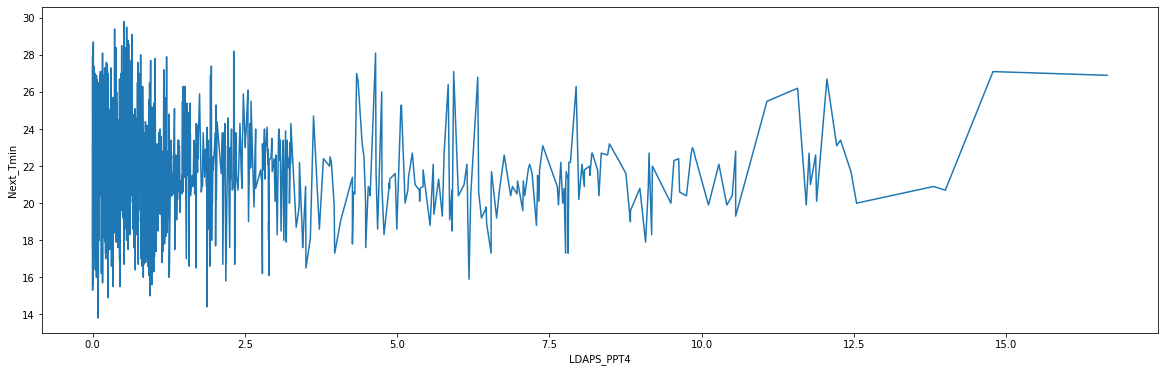

In [46]:
#LDAPS model forecast of next-day 4th 6-hour split average precipitation
plt.figure(figsize=(20,6))
sns.lineplot(x='LDAPS_PPT4',y='Next_Tmin',data=Data)

With increase in Precipitation Maximum and Minimum Air Temperature Decreases.

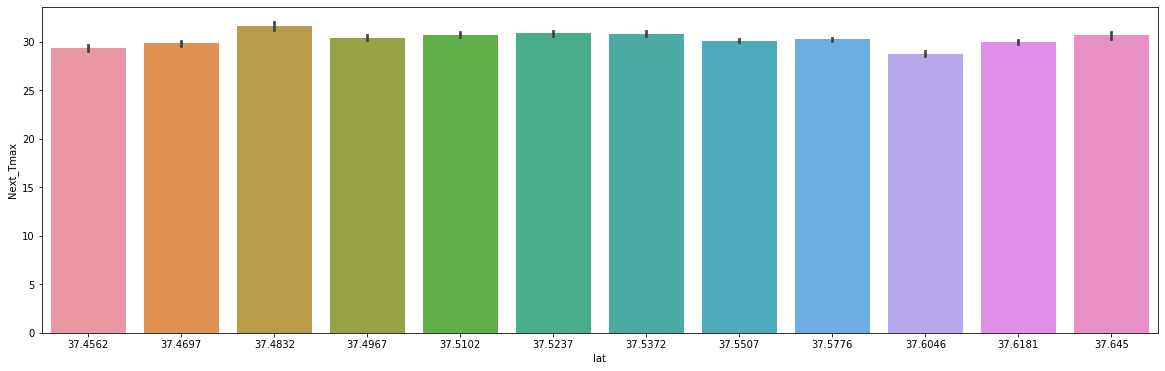

In [47]:
#Latitude
plt.figure(figsize=(20,6))
sns.barplot(x='lat',y='Next_Tmax',data=Data)

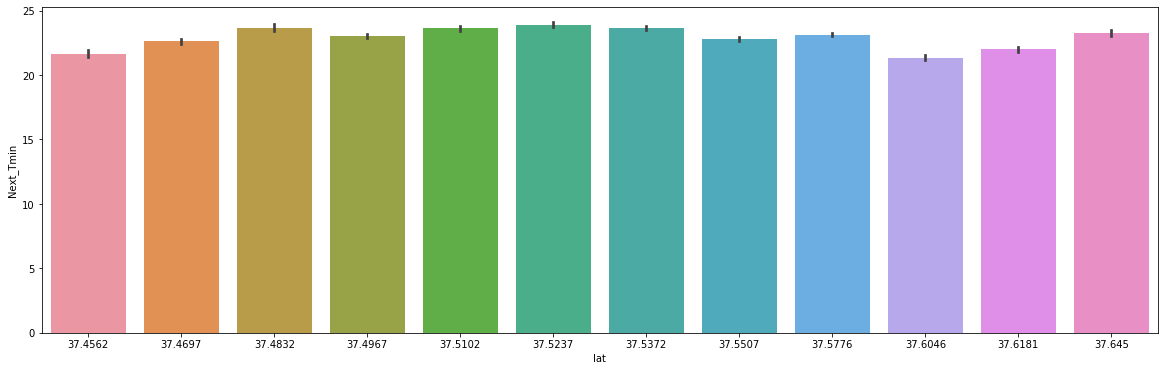

In [48]:
plt.figure(figsize=(20,6))
sns.barplot(x='lat',y='Next_Tmin',data=Data)

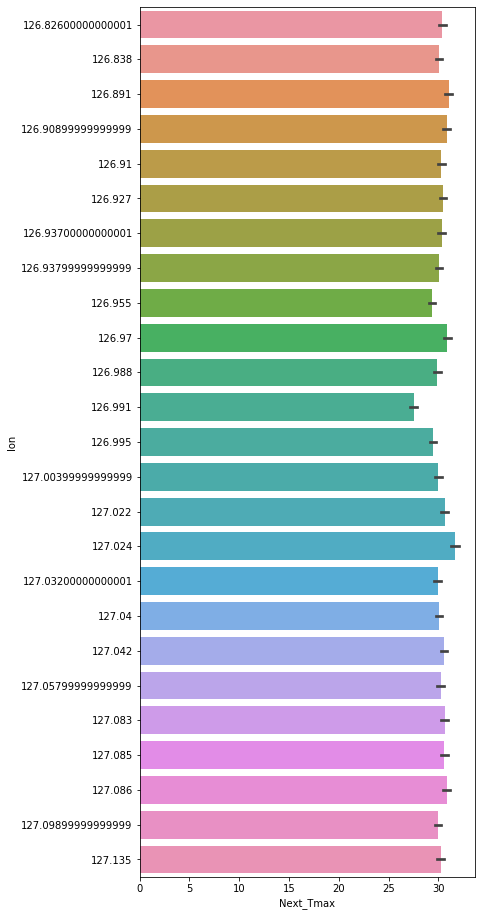

In [49]:
#Longitude
plt.figure(figsize=(6,16))
sns.barplot(y='lon',x='Next_Tmax',data=Data,orient='h')

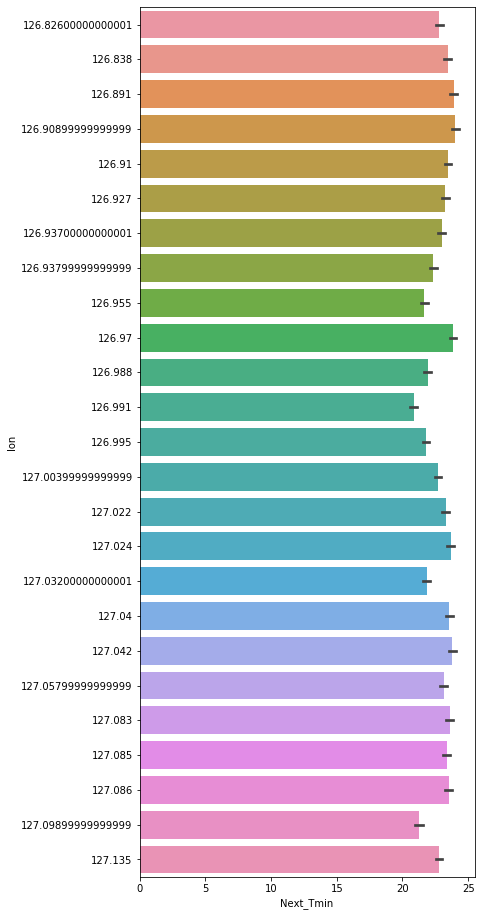

In [50]:
plt.figure(figsize=(6,16))
sns.barplot(y='lon',x='Next_Tmin',data=Data,orient='h')

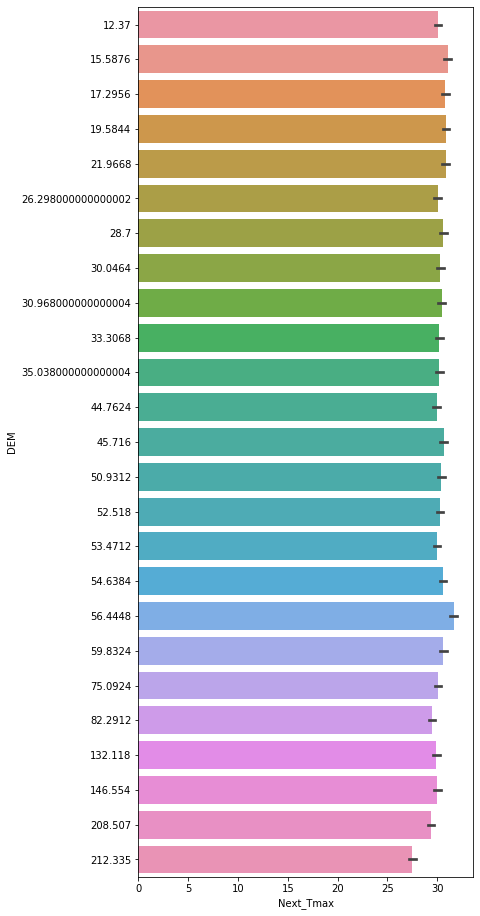

In [51]:
#Elevation
plt.figure(figsize=(6,16))
sns.barplot(y='DEM',x='Next_Tmax',data=Data,orient='h')

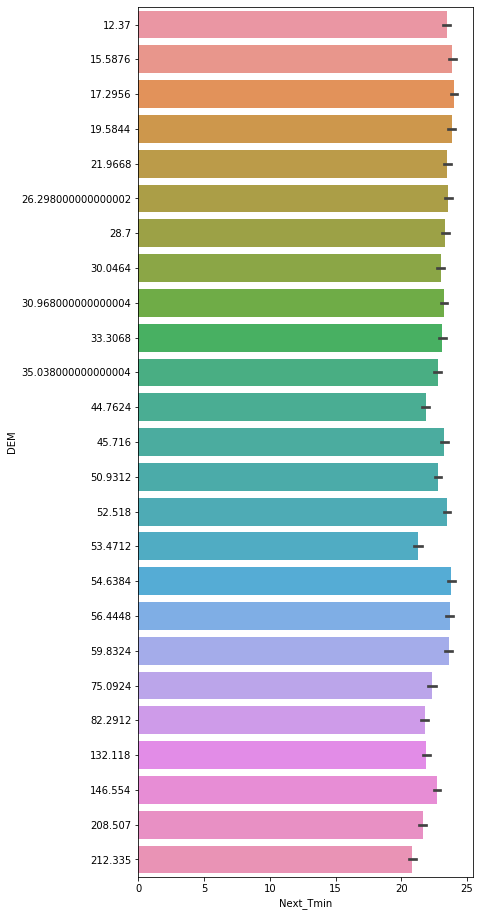

In [52]:
#Elevation
plt.figure(figsize=(6,16))
sns.barplot(y='DEM',x='Next_Tmin',data=Data,orient='h')

With Decrease in Elevation Next Day Air temperature Increases and with Increase in Elevation Next Day Air temperature Decreases.

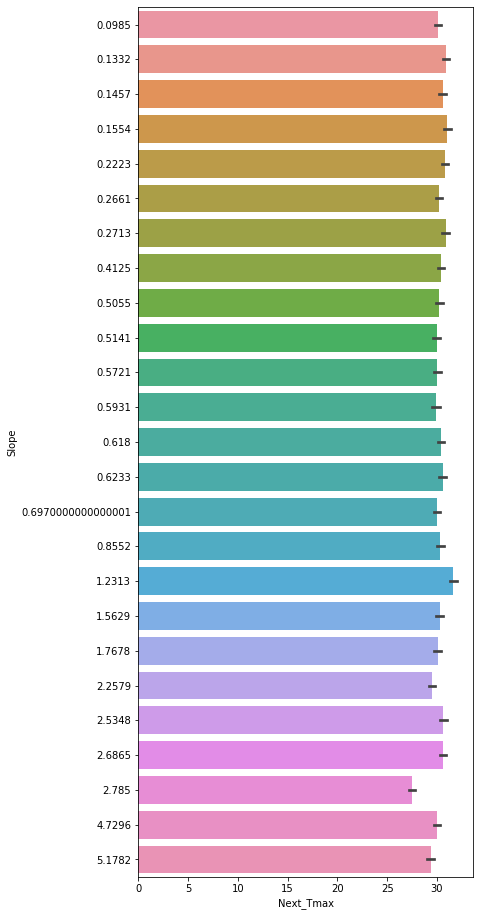

In [53]:
#Slope
plt.figure(figsize=(6,16))
sns.barplot(y='Slope',x='Next_Tmax',data=Data,orient='h')

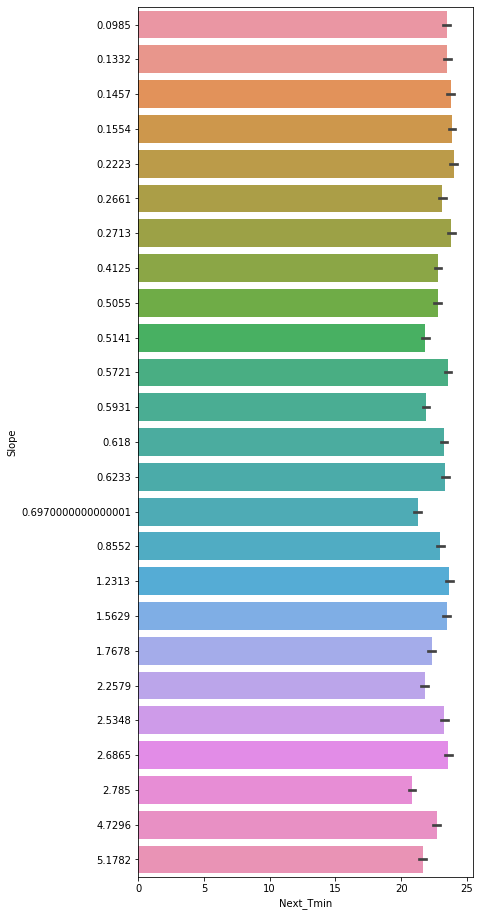

In [54]:
plt.figure(figsize=(6,16))
sns.barplot(y='Slope',x='Next_Tmin',data=Data,orient='h')

Slope is indirectly propertional to Air Temperature means increase in slope Air Temperature Decreases and decrease in slope Air Temperature increases.

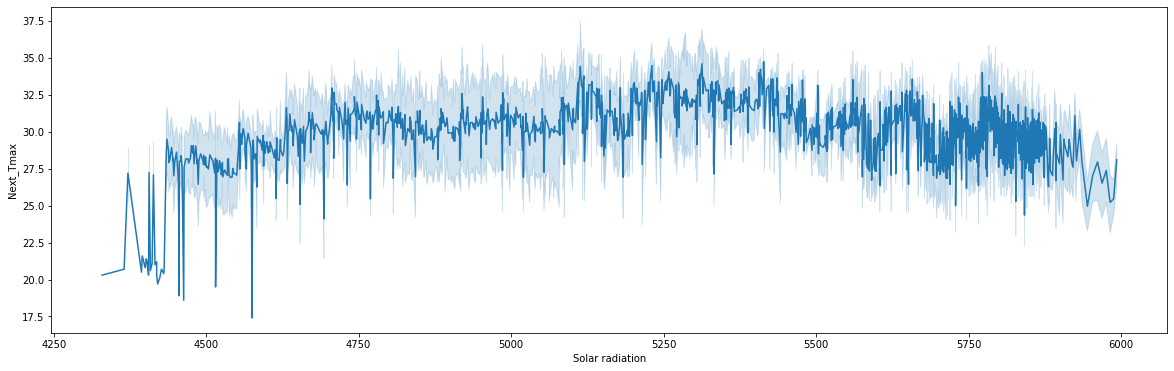

In [55]:
#Daily incoming solar radiation
plt.figure(figsize=(20,6))
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=Data)

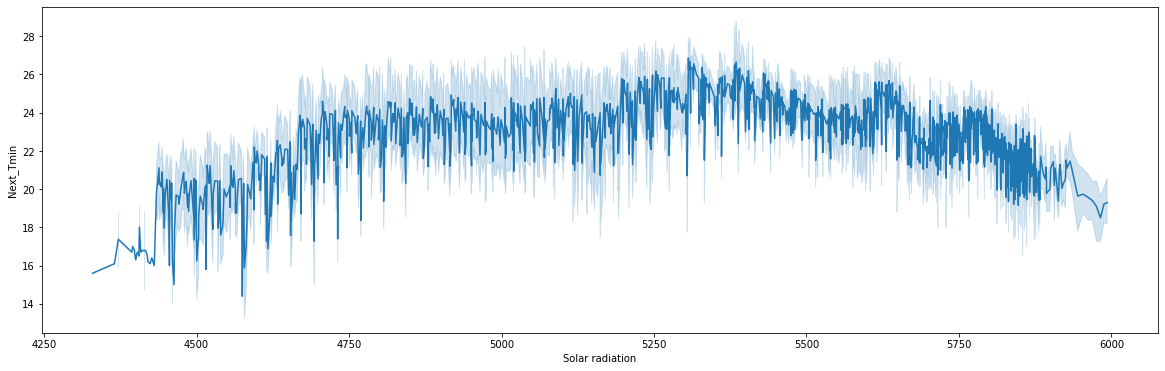

In [56]:
#Daily incoming solar radiation
plt.figure(figsize=(20,6))
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=Data)

Temperature is highest when Solar Radiation is in between 5000 wh/m2 to 5500 wh/m2.

Mapping the categorical values.

In [57]:
Data.Month.value_counts()

July      3820
August    3652
June       116
Name: Month, dtype: int64

In [58]:
Data['Month']=Data['Month'].map({'June':1,'July':2,'August':3})
Data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,1,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,1,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,1,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,1,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,1,30


# Checking the Correlation

In [59]:
cor=Data.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,0.001474,0.003114,-0.000799
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,0.056002,0.147358,-0.151982
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,0.037457,0.084047,-0.114294
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.002147,-0.190674,-0.060702
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.144286,-0.117317,-0.014242
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,0.020308,0.096915,-0.160191
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.000564,0.023412,-0.171284
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.114114,-0.113617,-0.040088
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,0.055898,0.060947,-0.019588
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.066233,-0.212477,-0.024234


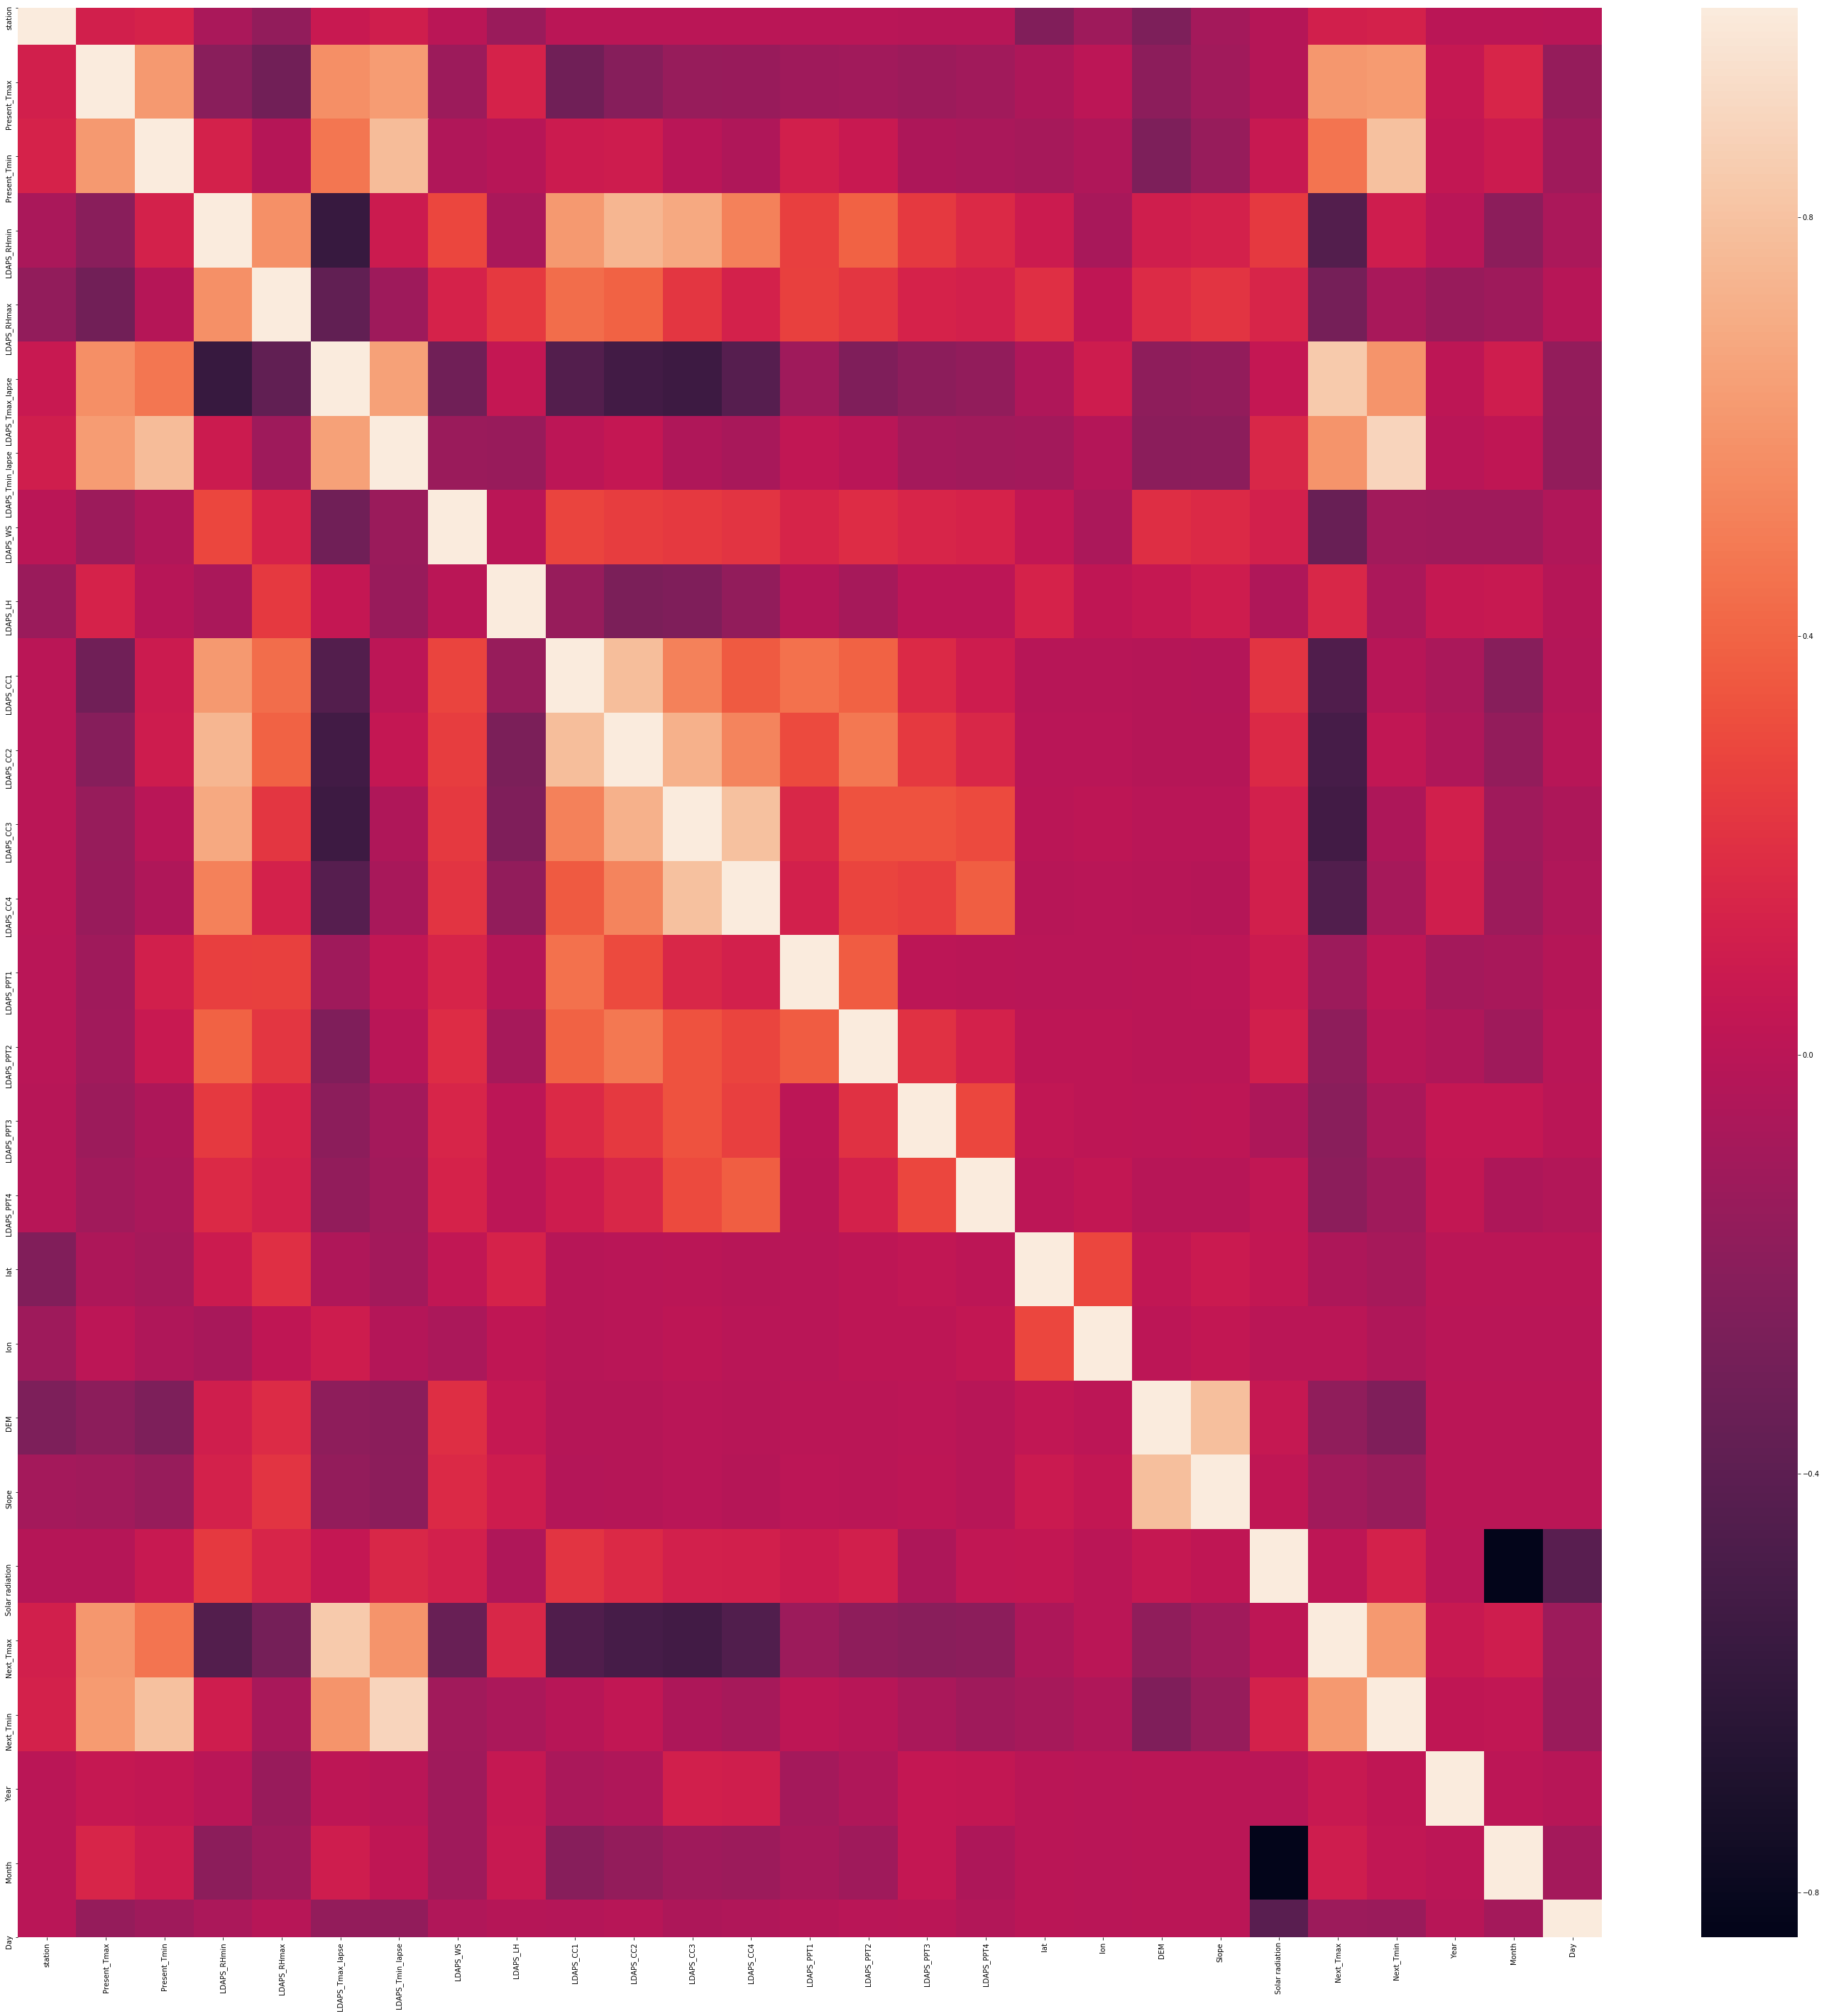

In [60]:
plt.figure(figsize=(50,50))
sns.heatmap(cor)

LDAPS_Tmax_lapse is highly negatively correlated with LDAPS_RHmin and cloud coverages.

Checking for Outliers

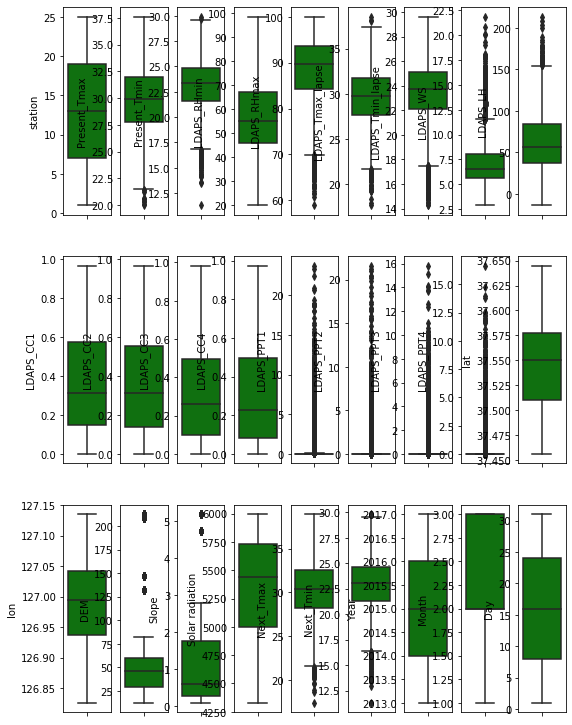

In [61]:
collist=Data.columns
col=9
row=10
plt.figure(figsize=(col,5*col))
for i in range(0,len(collist)):
    plt.subplot(row,col,i+1)
    sns.boxplot(Data[collist[i]],orient='v',color='green')

Outliers are present in some features.So we will remove them for getting the low variance dataset.

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.41176669, 2.77335883,
        1.57877772],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.41176669, 2.77335883,
        1.57877772],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.41176669, 2.77335883,
        1.57877772],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 1.42353686, 1.01021665,
        1.57877772],
       [1.52214457, 2.17321212, 2.28923218, ..., 1.42353686, 1.01021665,
        1.57877772],
       [1.66069897, 2.20691387, 2.41419461, ..., 1.42353686, 1.01021665,
        1.57877772]])

In [63]:
threshold=3
Data_new=Data[(z<3).all(axis=1)]
Data_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,1,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,1,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,1,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,1,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017,3,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017,3,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017,3,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017,3,30


In [64]:
print(Data.shape)
print(Data_new.shape)

(7588, 27)
(6739, 27)


849 Observations are removed as Outliers

# Checking the Skewness of our Cleansed Data

In [65]:
Data_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

In the Dataset 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3','LDAPS_PPT4','DEM','Slope' are right skewed.

Lets Normalize Them

In [66]:
list=['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
for i in list:
    Data_new[i]=np.log(Data_new[i]+1)

In [67]:
Data_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.329077
LDAPS_CC2           0.246509
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

In [68]:
Data_new['LDAPS_LH'].min()

-8.569042542

In [69]:
Data_new['LDAPS_LH']=np.log(Data_new['LDAPS_LH']+9)
Data_new['LDAPS_LH'].skew()

-0.5228509759092406

In [70]:
Data_new['LDAPS_WS']=np.log(Data_new['LDAPS_WS'])
Data_new['LDAPS_PPT1']=np.sqrt(Data_new['LDAPS_PPT1'])
Data_new['LDAPS_PPT2']=np.sqrt(Data_new['LDAPS_PPT2'])
Data_new['LDAPS_PPT3']=np.sqrt(Data_new['LDAPS_PPT3'])
Data_new['LDAPS_PPT4']=np.sqrt(Data_new['LDAPS_PPT4'])
Data_new['Slope']=np.sqrt(Data_new['Slope'])
Data_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.383109
LDAPS_LH           -0.522851
LDAPS_CC1           0.329077
LDAPS_CC2           0.246509
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          1.998860
LDAPS_PPT2          2.469687
LDAPS_PPT3          2.817733
LDAPS_PPT4          3.154348
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.356402
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

In [71]:
Data_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,4.362484,0.210218,...,37.6046,126.991,5.362864,1.153710,5992.895996,29.1,21.2,2013,1,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,4.109848,0.203356,...,37.6046,127.032,3.823463,0.644066,5869.312500,30.5,22.5,2013,1,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.814535,3.386863,0.190078,...,37.5776,127.058,3.535344,0.485738,5863.555664,31.1,23.9,2013,1,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.731664,4.313843,0.195873,...,37.6450,127.022,3.844087,1.123680,5856.964844,31.7,24.3,2013,1,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.746589,4.761879,0.140985,...,37.5507,127.135,3.584574,0.639629,5859.552246,31.2,22.5,2013,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.887562,2.923918,0.051550,...,37.5507,127.040,3.306813,0.672616,4456.024414,27.6,17.7,2017,3,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.752340,4.512470,0.064346,...,37.5102,127.086,3.134050,0.353618,4441.803711,28.0,17.1,2017,3,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.816276,4.395169,0.029592,...,37.5372,126.891,2.808655,0.380061,4443.313965,28.3,18.1,2017,3,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.878368,4.029654,0.035245,...,37.5237,126.909,2.906661,0.448034,4438.373535,28.6,18.8,2017,3,30


Now our Dataset is ready for machine learning lets split the dataset.

In [72]:
#In the dataset there are two targets 'Next_Tmax' and 'Next_Tmin'.when the target is Next_Tmax.
train_data=Data_new.drop(['Next_Tmax','Next_Tmin'],axis=1)
test_data=Data_new.loc[:,'Next_Tmax'].values.reshape(-1,1)
print(train_data)
print(test_data)

      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            28.074101         23.006936  1.919696  4.362484   0.21

In [73]:
#Scaling the train dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(train_data)
x=pd.DataFrame(x,columns=train_data.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.672719,-0.425704,-0.814460,0.195915,0.437537,-0.662498,-0.289928,0.108521,0.431698,-0.379923,...,-0.420264,-0.372042,1.211166,0.002925,2.091329,1.306490,1.543068,-1.421473,-2.806491,1.589342
1,-1.533959,0.690215,-0.727785,-0.236604,0.364239,-0.016693,0.171379,-0.605106,-0.058096,-0.417662,...,-0.420264,-0.372042,1.211166,0.518733,-0.026415,-0.374287,1.249502,-1.421473,-2.806491,1.589342
2,-1.395198,0.585598,0.008945,-0.494494,-0.585732,0.070769,0.409475,-0.306890,-1.459767,-0.490678,...,-0.420264,-0.372042,0.671467,0.845830,-0.422779,-0.896445,1.235827,-1.421473,-2.806491,1.589342
3,-1.256438,0.725088,0.052282,0.194767,1.206456,-0.069787,-0.146681,-0.634250,0.337396,-0.458811,...,-0.420264,-0.372042,2.018714,0.392926,0.001957,1.207454,1.220170,-1.421473,-2.806491,1.589342
4,-1.117678,0.515853,-0.597774,0.045667,0.299831,-0.284509,-0.074752,-0.575297,1.206017,-0.760645,...,-0.420264,-0.372042,0.133768,1.814542,-0.355053,-0.388921,1.226317,-1.421473,-2.806491,1.589342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.404059,-0.757521,-2.400625,-0.018415,-2.357293,-1.252451,...,-0.420264,-0.372042,0.133768,0.619378,-0.737167,-0.280131,-2.107693,1.442938,1.002379,1.589342
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.626356,-1.160213,-2.620034,-0.552578,0.722480,-1.182088,...,-0.420264,-0.372042,-0.675779,1.198089,-0.974837,-1.332171,-2.141474,1.442938,1.002379,1.589342
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.316889,-1.288468,-2.188536,-0.300014,0.495064,-1.373202,...,-0.420264,-0.372042,-0.136081,-1.255142,-1.422480,-1.244961,-2.137886,1.442938,1.002379,1.589342
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.542506,-1.049238,-2.207453,-0.054735,-0.213570,-1.342114,...,-0.420264,-0.372042,-0.405930,-1.028689,-1.287655,-1.020791,-2.149622,1.442938,1.002379,1.589342


In [74]:
y=test_data
y

array([[29.1],
       [30.5],
       [31.1],
       ...,
       [28.3],
       [28.6],
       [27.8]])

# Machine Learning

In [75]:
#it is a  Regression Problem so loading regression problem algorithm and metrics.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet
Max_r2_scr=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    if r2_scr>Max_r2_scr:
        Max_r2_scr=r2_scr
        Final_r_state=r_state
    print('Max r2 score corresponding to ',Final_r_state,' is ',Max_r2_scr)    

Max r2 score corresponding to  42  is  0.7509661549453475
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score corresponding to  43  is  0.7868614957046646
Max r2 score c

In [76]:
#Check if the model is Under or Over fitting
a_score=cross_val_score(lr,x,y,cv=10,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.59640193 0.53885561 0.57891039 0.72216151 0.69918398 0.57614484
 0.77135218 0.60861107 0.5796779  0.69907828]
0.6370377683863819


In [77]:
ls=Lasso()
param={'alpha':[0.1,0.01,0.2,0.2,0.001]}
gd=GridSearchCV(ls,param_grid=param,scoring='r2')
gd.fit(train_x,train_y)
best_param=gd.best_params_
print(best_param)
best_scr=gd.best_score_
print(best_scr)

{'alpha': 0.001}
0.7592932435573504


In [78]:
rd=Ridge()
param={'alpha':[0.1,0.01,0.2,0.2,0.001]}
gd=GridSearchCV(rd,param_grid=param,scoring='r2')
gd.fit(train_x,train_y)
best_param=gd.best_params_
print(best_param)
best_scr=gd.best_score_
print(best_scr)

{'alpha': 0.2}
0.7592542212658219


In [79]:
Ele=ElasticNet()
param={'alpha':[0.1,0.01,0.2,0.2,0.001]}
gd=GridSearchCV(Ele,param_grid=param,scoring='r2')
gd.fit(train_x,train_y)
best_param=gd.best_params_
print(best_param)
best_scr=gd.best_score_
print(best_scr)

{'alpha': 0.001}
0.7592799725913322


In [80]:
#Final LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=43,test_size=0.25)
lr.fit(train_x,train_y)
lrpred=lr.predict(test_x)
print('Predicted Next Day Max Temp',lrpred)
print('r2 score',r2_score(lrpred,test_y))
print('Mean Absolute Error',mean_absolute_error(lrpred,test_y))
print('Mean Squared Error',mean_squared_error(lrpred,test_y))

Predicted Next Day Max Temp [[29.12675547]
 [31.9959126 ]
 [28.3226699 ]
 ...
 [30.02833791]
 [24.03829065]
 [31.02177752]]
r2 score 0.7409663754172993
Mean Absolute Error 1.0398509152085107
Mean Squared Error 1.89137351265362


Checking the accuracy and predictions using the other algorithms.

In [81]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(sv,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'rbf'}
0.8643902508847834


In [82]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(sv,param_grid=param,scoring='r2',cv=10)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'rbf'}
0.870498795588308


In [83]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(sv,param_grid=param,scoring='r2',cv=20)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'rbf'}
0.8712991118632635


In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mae','mse','friedman_mse']}
gd_sr=GridSearchCV(dt,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'criterion': 'mse'}
0.7467015351741767


In [85]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mae','mse','friedman_mse']}
gd_sr=GridSearchCV(dt,param_grid=param,scoring='r2',cv=10)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'criterion': 'friedman_mse'}
0.7466228155223433


In [86]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(knn,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_neighbors': 50}
0.7400618098152403


In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(knn,param_grid=param,scoring='r2',cv=10)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_neighbors': 50}
0.7506997095165872


Checking the results through Ensempling techniques

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(rf,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 400}
0.8863898465135148


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(gb,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 400}
0.9036979456241144


From all analysis we found that GradientBoostingRegressor has the heighest r2 score of 0.9036979456241144(90.36%) when n_estimators=400, so we save its prediction and save the model for producction. 

In [91]:
gb=GradientBoostingRegressor(n_estimators=400)
gb.fit(train_x,train_y)
gbpred=gb.predict(test_x)
print('Predicted Next Day Max Temp',gbpred)
print('r2 score',r2_score(gbpred,test_y))
print('Mean Absolute Error',mean_absolute_error(gbpred,test_y))
print('Mean Squared Error',mean_squared_error(gbpred,test_y))

Predicted Next Day Max Temp [29.66061686 32.51749529 30.15005375 ... 30.39517951 26.17169836
 29.95240151]
r2 score 0.8954168357602307
Mean Absolute Error 0.6909635886337147
Mean Squared Error 0.8176259620548095


In [92]:
test1=np.array([6,36.2,17.3,57,99,31,23.12,3.54,9,11,5,6,9,77,9,2,6,32,133,6,5,5565,2015,3,25]).reshape(1,-1)
gb.predict(test1)

array([33.26599393])

In [93]:
test2=np.array([16,35.2,17.3,57,9,33,63.12,3.54,4,1,5,6,9,7,9,2,6,2,55,6,5,8785,2013,2,11]).reshape(1,-1)
gb.predict(test2)

array([33.8829444])

In [94]:
#Saving the prediction in csv
df=pd.DataFrame(gbpred)
df.to_csv('Pred_Next_Day_Max_temp.csv')

In [95]:
#Saving the Mmodel for Production
from sklearn.externals import joblib
joblib.dump(gb,'Pred_Next_Day_Max_temp.obj')

['Pred_Next_Day_Max_temp.obj']

# Machine Learning for Predicting Next Day Minimum Air Temperature (Next_Tmin) when Next_Tmin is availbale with other features.

In [96]:
train_data=Data_new.drop(['Next_Tmin'],axis=1)
test_data=Data_new.loc[:,'Next_Tmin'].values.reshape(-1,1)
print(train_data)
print(test_data)

      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            28.074101         23.006936  1.919696  4.362484   0.21

In [97]:
#Scaling the Train_Data
sc=StandardScaler()
X=sc.fit_transform(train_data)
X=pd.DataFrame(X,columns=train_data.columns)
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Year,Month,Day
0,-1.672719,-0.425704,-0.814460,0.195915,0.437537,-0.662498,-0.289928,0.108521,0.431698,-0.379923,...,-0.372042,1.211166,0.002925,2.091329,1.306490,1.543068,-0.489951,-1.421473,-2.806491,1.589342
1,-1.533959,0.690215,-0.727785,-0.236604,0.364239,-0.016693,0.171379,-0.605106,-0.058096,-0.417662,...,-0.372042,1.211166,0.518733,-0.026415,-0.374287,1.249502,-0.011135,-1.421473,-2.806491,1.589342
2,-1.395198,0.585598,0.008945,-0.494494,-0.585732,0.070769,0.409475,-0.306890,-1.459767,-0.490678,...,-0.372042,0.671467,0.845830,-0.422779,-0.896445,1.235827,0.194072,-1.421473,-2.806491,1.589342
3,-1.256438,0.725088,0.052282,0.194767,1.206456,-0.069787,-0.146681,-0.634250,0.337396,-0.458811,...,-0.372042,2.018714,0.392926,0.001957,1.207454,1.220170,0.399279,-1.421473,-2.806491,1.589342
4,-1.117678,0.515853,-0.597774,0.045667,0.299831,-0.284509,-0.074752,-0.575297,1.206017,-0.760645,...,-0.372042,0.133768,1.814542,-0.355053,-0.388921,1.226317,0.228274,-1.421473,-2.806491,1.589342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.404059,-0.757521,-2.400625,-0.018415,-2.357293,-1.252451,...,-0.372042,0.133768,0.619378,-0.737167,-0.280131,-2.107693,-1.002969,1.442938,1.002379,1.589342
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.626356,-1.160213,-2.620034,-0.552578,0.722480,-1.182088,...,-0.372042,-0.675779,1.198089,-0.974837,-1.332171,-2.141474,-0.866164,1.442938,1.002379,1.589342
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.316889,-1.288468,-2.188536,-0.300014,0.495064,-1.373202,...,-0.372042,-0.136081,-1.255142,-1.422480,-1.244961,-2.137886,-0.763561,1.442938,1.002379,1.589342
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.542506,-1.049238,-2.207453,-0.054735,-0.213570,-1.342114,...,-0.372042,-0.405930,-1.028689,-1.287655,-1.020791,-2.149622,-0.660957,1.442938,1.002379,1.589342


In [98]:
Y=test_data
Y

array([[21.2],
       [22.5],
       [23.9],
       ...,
       [18.1],
       [18.8],
       [17.4]])

In [99]:
max_r2_scr=0
for r_state in range(42,101):
    train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=r_state,test_size=0.25)
    lr=LinearRegression()
    lr.fit(train_X,train_Y)
    pred=lr.predict(test_X)
    r2_scr=r2_score(test_Y,pred)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        Final_r_state=r_state
    print('max r2 score corresponding to ',Final_r_state,' is ',max_r2_scr)   

max r2 score corresponding to  42  is  0.8319292767045238
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score corresponding to  43  is  0.8539190802199813
max r2 score c

In [100]:
#Check if the model is Under or Over fitting
a_score=cross_val_score(lr,X,Y,cv=10,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.52814541 0.82048841 0.60513583 0.67437471 0.83798178 0.73568443
 0.87070867 0.80177944 0.85647708 0.87737069]
0.760814645380898


In [101]:
ls=Lasso()
param={'alpha':[0.1,0.01,0.2,0.2,0.001]}
gd=GridSearchCV(ls,param_grid=param,scoring='r2')
gd.fit(train_X,train_Y)
best_param=gd.best_params_
print(best_param)
best_scr=gd.best_score_
print(best_scr)

{'alpha': 0.001}
0.8424699692674269


In [102]:
rd=Ridge()
param={'alpha':[0.1,0.01,0.2,0.2,0.001]}
gd=GridSearchCV(rd,param_grid=param,scoring='r2')
gd.fit(train_X,train_Y)
best_param=gd.best_params_
print(best_param)
best_scr=gd.best_score_
print(best_scr)

{'alpha': 0.2}
0.8424579687096813


In [103]:
el=ElasticNet()
param={'alpha':[0.1,0.01,0.2,0.2,0.001]}
gd=GridSearchCV(el,param_grid=param,scoring='r2')
gd.fit(train_X,train_Y)
best_param=gd.best_params_
print(best_param)
best_scr=gd.best_score_
print(best_scr)

{'alpha': 0.001}
0.8424697994565525


In [104]:
#Final LinearRegression for predicting Next_Tmin
Lr=LinearRegression()
Lr.fit(train_X,train_Y)
LRpred=Lr.predict(test_X)
print('Predicted Next Day Minimum Air Temperature',LRpred)
print('R2 score',r2_score(test_Y,LRpred))
print('Mean Absolute Error',mean_absolute_error(test_Y,LRpred))
print('Mean Squared Error',mean_squared_error(test_Y,LRpred))

Predicted Next Day Minimum Air Temperature [[21.55808612]
 [23.27667193]
 [27.50810834]
 ...
 [24.53693913]
 [21.392564  ]
 [25.91254077]]
R2 score 0.8357317565471171
Mean Absolute Error 0.7522394765507705
Mean Squared Error 0.8969087656794449


In [105]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(sv,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'rbf'}
0.911748363749327


In [106]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mae','mse','friedman_mse']}
gd_sr=GridSearchCV(dt,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'criterion': 'friedman_mse'}
0.772387207584673


In [107]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,150,200,250,300]}
gd_sr=GridSearchCV(knn,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_neighbors': 50}
0.7921935121456432


Checking the results through Ensemble Methods 

In [110]:
rf=RandomForestRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(rf,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 400}
0.8966539300887424


In [113]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(ada,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 300}
0.8126302617611006


In [114]:
gbr=GradientBoostingRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(gbr,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_X,train_Y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 400}
0.9218007521328123


GradientBoostingRegressor has highest r2 Score of 0.9218007521328123(92.18%). so we save this model and its prediction.

In [124]:
#Final Model
Gb=GradientBoostingRegressor(n_estimators=400)
Gb.fit(train_X,train_Y)
Gbpred=Gb.predict(test_X)
print('Predicted Next Day Minimum Air Temperature',Gbpred)
print('r2 score',r2_score(Gbpred,test_Y))
print('Mean Absolute Error',mean_absolute_error(Gbpred,test_Y))
print('Mean Squared Error',mean_squared_error(Gbpred,test_Y))

Predicted Next Day Minimum Air Temperature [22.57021521 24.32742839 28.32397597 ... 24.54678453 21.8205771
 26.51944952]
r2 score 0.9257088645936584
Mean Absolute Error 0.48684650900424004
Mean Squared Error 0.38051685372863137


In [132]:
#Checking if the model is over or under fitting
A_score=cross_val_score(Gb,X,Y,scoring='r2')
print(A_score)
print(np.mean(A_score))

[0.73238861 0.79937798 0.84018281]
0.7906498003401037


In [130]:
test3=np.array([23,35.2,17.3,57,9,33,63.12,3.54,4,1,5,6,9,7,9,2,6,2,55,6,5,8785,35.01,2016,2,11]).reshape(1,-1)
Gb.predict(test3)

array([27.12730203])

In [134]:
test4=np.array([6,36.5,12,22,66,32,3,66,11,3,5,6,22,3,6,5,6,6,4,36,6,6,37,2014,1,22]).reshape(1,-1)
Gb.predict(test4)

array([27.03370514])

In [135]:
#Saving the Prediction in CSV
df=pd.DataFrame(Gbpred)
df.to_csv('Predicted_Next_Day_Minimum_Temperature.csv')

In [136]:
#Saving The model for production
from sklearn.externals import joblib
joblib.dump(Gb,'Predicted_Next_Day_Minimum_Temperature.obj')

['Predicted_Next_Day_Minimum_Temperature.obj']